In [1]:
import numpy as np

data = np.loadtxt('BeH_p_data.txt', skiprows=1)
BeH_p_bondlengths = data[:, 0].tolist()
BeH_p_fcis = [data[:, 1].tolist(), data[:, 4].tolist()]
BeH_p_energies = [data[:, 2].tolist(), data[:, 5].tolist()]
BeH_p_errors = [data[:, 3].tolist(), data[:, 6].tolist()]

data = np.loadtxt('HCl_data.txt', skiprows=1)
HCl_bondlengths = data[:, 0].tolist()
HCl_fcis = [data[:, 1].tolist(), data[:, 4].tolist()]
HCl_energies = [data[:, 2].tolist(), data[:, 5].tolist()]
HCl_errors = [data[:, 3].tolist(), data[:, 6].tolist()]

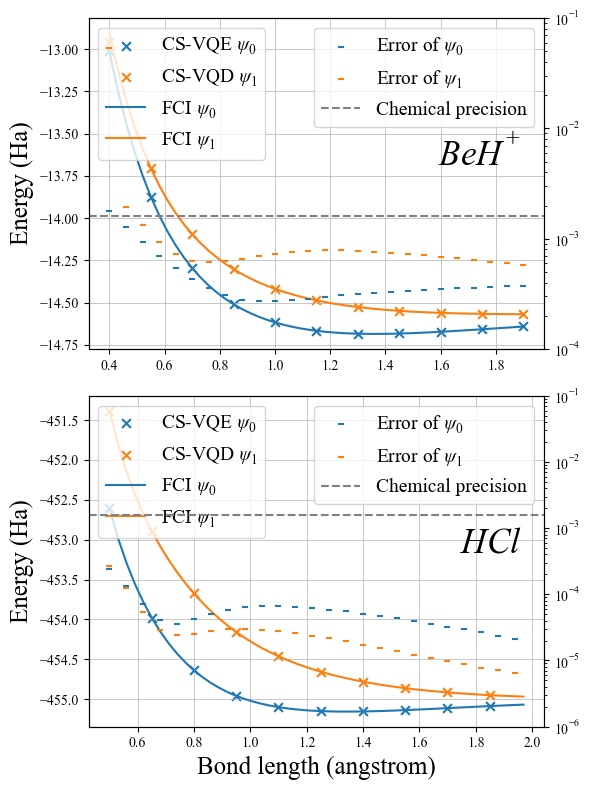

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Times New Roman'
rcParams['mathtext.it'] = 'Times New Roman:italic'
rcParams['mathtext.bf'] = 'Times New Roman:bold'
label_fontsize = 18
legend_fontsize = 14

energy_step=5
error_step=2
def plot_data(ax, bondlengths, energies, fcis, errors, ax_twin_ylim):
    ax.scatter(bondlengths[::energy_step], energies[0][::energy_step], label=r'CS-VQE $\psi_0$', marker='x', s=40)
    ax.scatter(bondlengths[::energy_step], energies[1][::energy_step], label=r'CS-VQD $\psi_1$', marker='x', s=40)
    ax.plot(bondlengths, fcis[0], label=r'FCI $\psi_0$')
    ax.plot(bondlengths, fcis[1], label=r'FCI $\psi_1$')
    ax_twin = ax.twinx()
    ax_twin.scatter(bondlengths[::error_step], errors[0][::error_step], label=r'Error of $\psi_0$', marker='_', s=15)
    ax_twin.scatter(bondlengths[::error_step], errors[1][::error_step], label=r'Error of $\psi_1$', marker='_', s=15)
    ax_twin.set_ylim(ax_twin_ylim[0], ax_twin_ylim[1])
    ax_twin.set_yscale('log')
    ax_twin.axhline(y=0.0016, color='grey', linestyle='--', label='Chemical precision')
    ax.legend(loc='upper left', fontsize=legend_fontsize)
    ax.grid(which='both', axis='both', linestyle='-', linewidth=0.5)
    ax_twin.legend(loc='upper right', fontsize=legend_fontsize)
    

fig, axs = plt.subplots(2, 1, figsize=(6, 8))

# BeH+
plot_data(axs[0], BeH_p_bondlengths, BeH_p_energies, BeH_p_fcis, BeH_p_errors, (1e-4, 1e-1))
axs[0].text(0.95, 0.65, r'$BeH^+$', transform=axs[0].transAxes, ha='right', va='top', fontsize=25)

# HCl
plot_data(axs[1], HCl_bondlengths, HCl_energies, HCl_fcis, HCl_errors, (1e-6, 1e-1))
axs[1].text(0.95, 0.6, r'$HCl$', transform=axs[1].transAxes, ha='right', va='top', fontsize=25)

axs[1].set_xlabel('Bond length (angstrom)', fontsize=label_fontsize)
axs[0].set_ylabel('Energy (Ha)', fontsize=label_fontsize)
axs[1].set_ylabel('Energy (Ha)', fontsize=label_fontsize)

plt.tight_layout()